In [263]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen


In [264]:
pd.set_option('display.max_colwidth', 25)

# To get input
symbol = input('Enter a ticker: ')
print ('Getting data for ' + symbol + '...\n')

# Scraper
url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

Getting data for GOOG...



In [265]:
# Storing all the list of articles for the stock in a dataframe

news_table = html.find(id='news-table') # To find the news table in the html code

parsed_data = []

for row in news_table.findAll('tr'): # Iterating through the list

    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 21:
        time = date_data[12][:-4]
    else:
        date = date_data[12]
        time = date_data[13][:-4]

    parsed_data.append([date, time, title])

df = pd.DataFrame(parsed_data, columns=['Date', 'time', 'title'])

df

,Date,time,title
0,Jun-24-23,01:00,'Fewer swings but bet...
1,Jun-23-23,07:52,Googles YouTube Is Te...
2,Jun-23-23,04:30,Indian government kno...
3,Jun-23-23,01:35,Marketing expert Mart...
4,Jun-22-23,04:36,Canada Passes Law For...
...,...,...,...
95,May-17-23,07:30,"IBM, Google Give $150..."
96,May-16-23,06:40,What Is ChatGPT? What...
97,May-16-23,04:49,Alphabets Market Cap ...
98,May-16-23,02:32,OpenAI CEO calls on g...


In [266]:
# Importing modules for sentiment analysis and plot
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

vader = SentimentIntensityAnalyzer() # For sentiment analysis

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

df['Date'] = pd.to_datetime(df['Date'])

df

C:\Users\dharu\AppData\Local\Temp\ipykernel_33964\2435474570.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,time,title,compound
0,2023-06-24,01:00,'Fewer swings but bet...,0.8047
1,2023-06-23,07:52,Googles YouTube Is Te...,0.0000
2,2023-06-23,04:30,Indian government kno...,-0.4019
3,2023-06-23,01:35,Marketing expert Mart...,0.2023
4,2023-06-22,04:36,Canada Passes Law For...,-0.1027
...,...,...,...,...
95,2023-05-17,07:30,"IBM, Google Give $150...",-0.1531
96,2023-05-16,06:40,What Is ChatGPT? What...,0.0000
97,2023-05-16,04:49,Alphabets Market Cap ...,0.0000
98,2023-05-16,02:32,OpenAI CEO calls on g...,0.0000


In [267]:
result = df.groupby('Date')['compound'].mean().reset_index()

result = result.sort_values(by='Date', key=lambda x: x.map(df['Date'].unique().tolist().index))

result.reset_index(inplace = True)

In [268]:
import yfinance as yf

ticker = yf.Ticker(symbol)

ticker.info

hist = ticker.history(period="10d")
hist.reset_index(inplace = True)

array_date = []
for date in hist['Date']:
    array_date.append(date.date())

hist['Date'] = array_date

Open_arr = np.array(hist['Open'])
Close_arr = np.array(hist['Close'])

Returns = (Close_arr - Open_arr)/Close_arr

hist['returns'] = Returns.tolist()

hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
0,2023-06-09,122.559998,124.285004,122.419998,122.870003,20304500,0.0,0.0,0.002523
1,2023-06-12,123.394997,124.750000,122.349998,124.349998,22255700,0.0,0.0,0.007680
2,2023-06-13,125.650002,125.860001,123.845001,124.430000,19287700,0.0,0.0,-0.009805
3,2023-06-14,123.800003,124.790001,122.160004,124.379997,24659600,0.0,0.0,0.004663
4,2023-06-15,123.879997,126.160004,123.139999,125.790001,24517100,0.0,0.0,0.015184
5,2023-06-16,126.699997,126.699997,123.790001,124.059998,56686800,0.0,0.0,-0.021280
6,2023-06-20,123.535004,125.175003,122.830002,123.849998,22698000,0.0,0.0,0.002543
7,2023-06-21,123.235001,123.410004,120.860001,121.260002,22612000,0.0,0.0,-0.016287
8,2023-06-22,120.660004,123.934998,119.599998,123.870003,20781900,0.0,0.0,0.025914
9,2023-06-23,122.040001,123.440002,121.860001,123.019997,29542900,0.0,0.0,0.007966


In [269]:
arr = []
for date in result.loc[:,'Date']:
    arr.append(date.date())

result.loc[:,'Date'] = arr

result

,index,Date,compound
0,31,2023-06-24,0.804700
1,30,2023-06-23,-0.066533
2,29,2023-06-22,-0.102700
3,28,2023-06-21,0.024417
4,27,2023-06-20,0.025600
5,26,2023-06-17,0.000000
6,25,2023-06-16,-0.340000
7,24,2023-06-15,-0.195925
8,23,2023-06-14,0.000000
9,22,2023-06-13,0.299700


In [270]:
final_data = pd.DataFrame()

final_data['Date'] = hist['Date']

final_data = pd.merge(result, hist, on='Date')

final_data

,index,Date,compound,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
0,30,2023-06-23,-0.066533,122.040001,123.440002,121.860001,123.019997,29542900,0.0,0.0,0.007966
1,29,2023-06-22,-0.102700,120.660004,123.934998,119.599998,123.870003,20781900,0.0,0.0,0.025914
2,28,2023-06-21,0.024417,123.235001,123.410004,120.860001,121.260002,22612000,0.0,0.0,-0.016287
3,27,2023-06-20,0.025600,123.535004,125.175003,122.830002,123.849998,22698000,0.0,0.0,0.002543
4,25,2023-06-16,-0.340000,126.699997,126.699997,123.790001,124.059998,56686800,0.0,0.0,-0.021280
5,24,2023-06-15,-0.195925,123.879997,126.160004,123.139999,125.790001,24517100,0.0,0.0,0.015184
6,23,2023-06-14,0.000000,123.800003,124.790001,122.160004,124.379997,24659600,0.0,0.0,0.004663
7,22,2023-06-13,0.299700,125.650002,125.860001,123.845001,124.430000,19287700,0.0,0.0,-0.009805
8,21,2023-06-12,-0.122800,123.394997,124.750000,122.349998,124.349998,22255700,0.0,0.0,0.007680


In [283]:
date_arr = np.array(final_data['Date'])[:5]
compound_arr = np.array(final_data['compound'])[:5]
returns_arr = np.array(final_data['returns'])[:5]

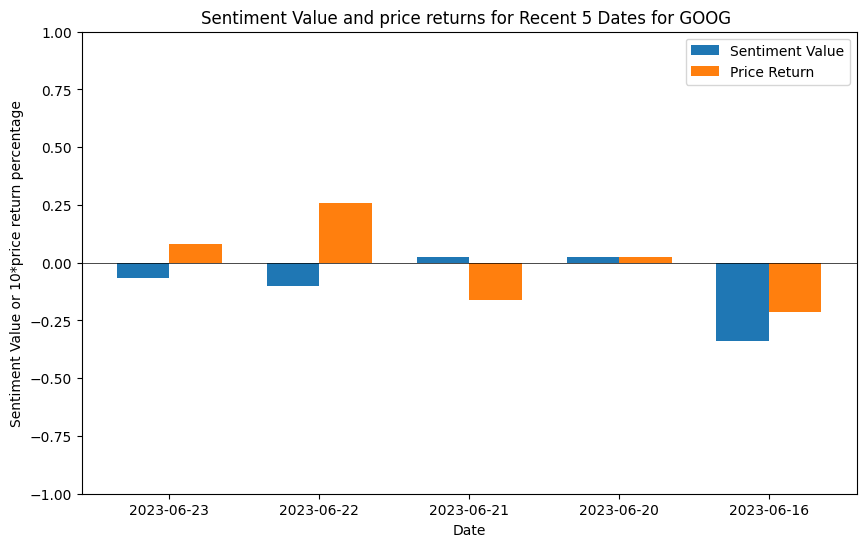

In [303]:
plt.figure(figsize=(10, 6)) 
index = np.arange(len(date_arr))

bar_width = 0.35

plt.bar(index,compound_arr,width=bar_width, label='Sentiment Value')
plt.bar(index+0.35,10*returns_arr,width=bar_width, label='Price Return')
plt.xlabel('Date')
plt.ylabel('Sentiment Value or 10*price return percentage')
plt.xticks(index + bar_width/2, date_arr)
plt.title(f'Sentiment Value and price returns for Recent 5 Dates for {symbol} ')
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.ylim(bottom=-1,top = 1)
plt.legend()
plt.show()